In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import os

In [2]:
file = os.path.join('winequality-red.csv')
data = pd.read_csv(file)

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
column_name = 'quality_score'
data.loc[data['quality'] >= 6, 'quality_score'] = 'high'
data.loc[data['quality'] <= 5, 'quality_score'] = 'med'

In [9]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,med
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,med
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,med
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,med


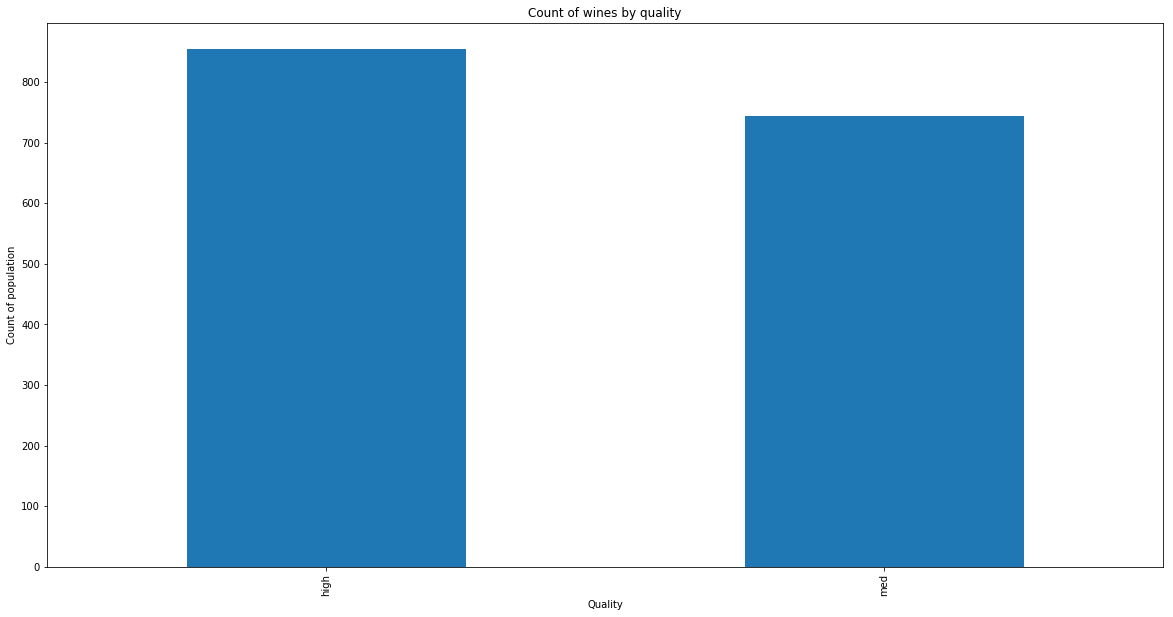

In [10]:
data['quality_score'].value_counts().plot(kind='bar', stacked=True, figsize=(20, 10))

plt.title('Count of wines by quality')
plt.xlabel('Quality')
plt.ylabel('Count of population')
font = {'family' : 'DejaVu Sans', 'weight' : 'bold', 'size' : '22'}
plt.rc('font', **font);
plt.show()

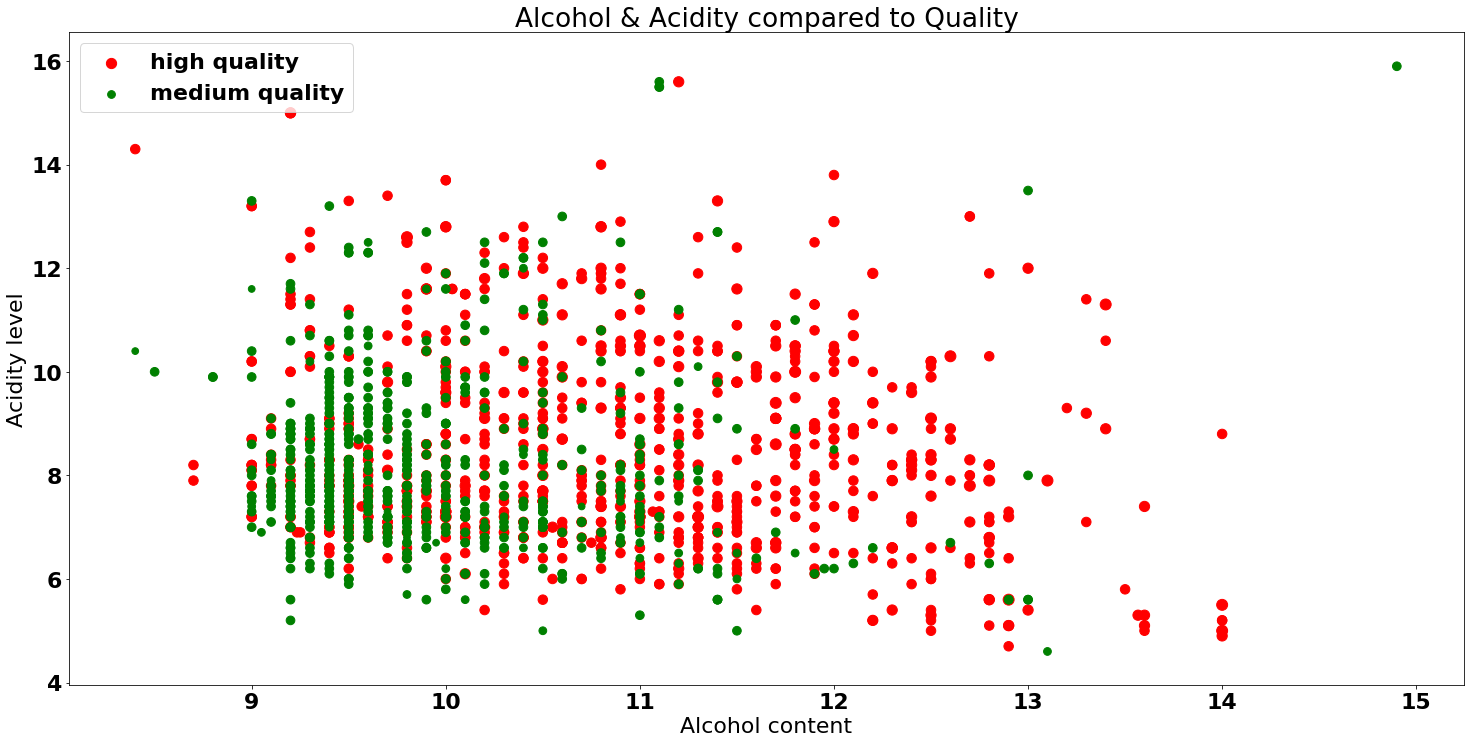

In [11]:
plt.figure(figsize=(25, 12))
ax = plt.subplot()

ax.scatter(data[data['quality_score'] == 'high']['alcohol'], data[data['quality_score'] == 'high']['fixed acidity'], c='red', s=data[data['quality_score'] == 'high']['quality']*15, label='high quality')
ax.scatter(data[data['quality_score'] == 'med']['alcohol'], data[data['quality_score'] == 'med']['fixed acidity'], c='green', s=data[data['quality_score'] == 'med']['quality']*15, label='medium quality')


ax.set_title('Alcohol & Acidity compared to Quality')
ax.set_xlabel('Alcohol content')
ax.set_ylabel('Acidity level')
font = {'family' : 'DejaVu Sans', 'weight' : 'bold', 'size' : '22'}
plt.rc('font', **font)

plt.legend();
plt.show()
# plt.savefig()

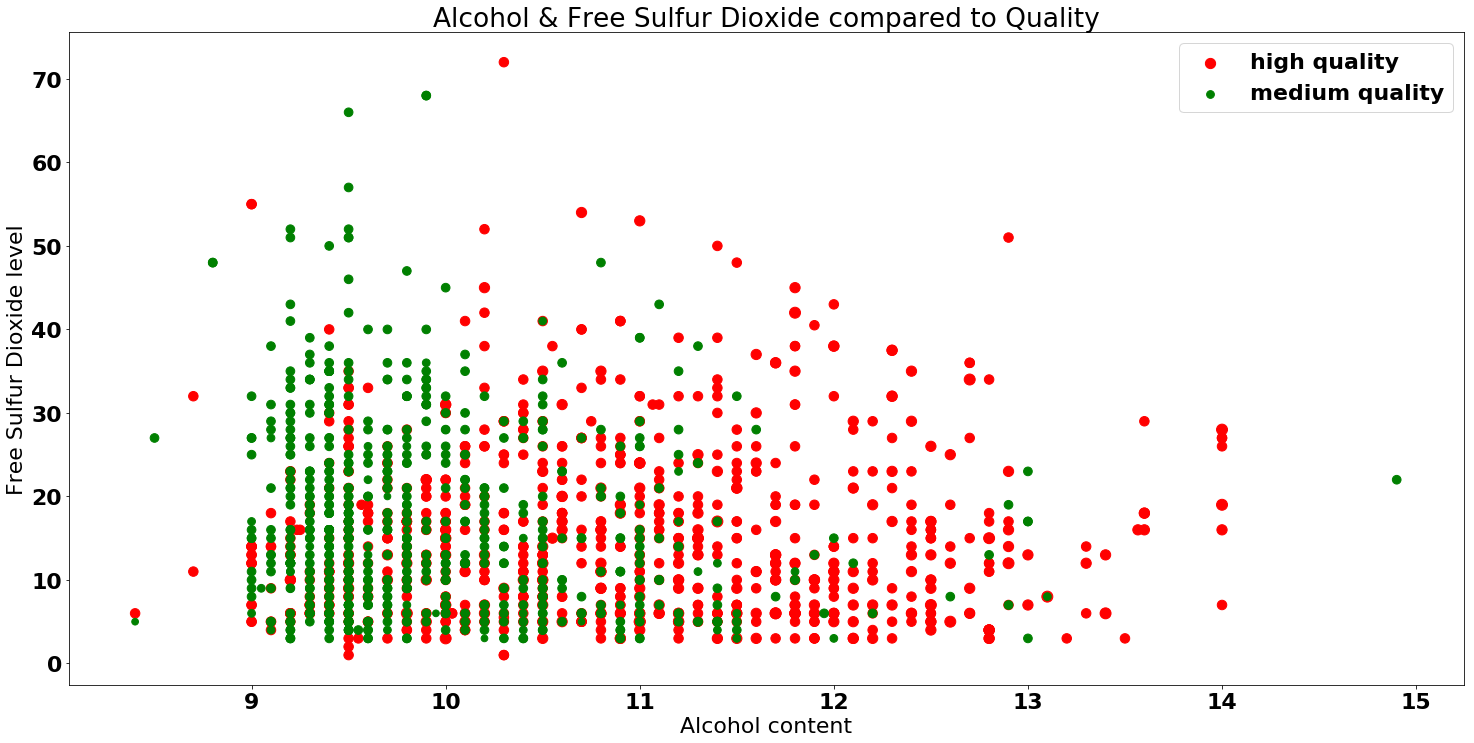

In [12]:
plt.figure(figsize=(25, 12))
ax = plt.subplot()

ax.scatter(data[data['quality_score'] == 'high']['alcohol'], data[data['quality_score'] == 'high']['free sulfur dioxide'], c='red', s=data[data['quality_score'] == 'high']['quality']*15, label='high quality')
ax.scatter(data[data['quality_score'] == 'med']['alcohol'], data[data['quality_score'] == 'med']['free sulfur dioxide'], c='green', s=data[data['quality_score'] == 'med']['quality']*15, label='medium quality')

ax.set_title('Alcohol & Free Sulfur Dioxide compared to Quality')
ax.set_xlabel('Alcohol content')
ax.set_ylabel('Free Sulfur Dioxide level')
font = {'family' : 'DejaVu Sans', 'weight' : 'bold', 'size' : '22'}
plt.rc('font', **font)

plt.legend();
plt.show()

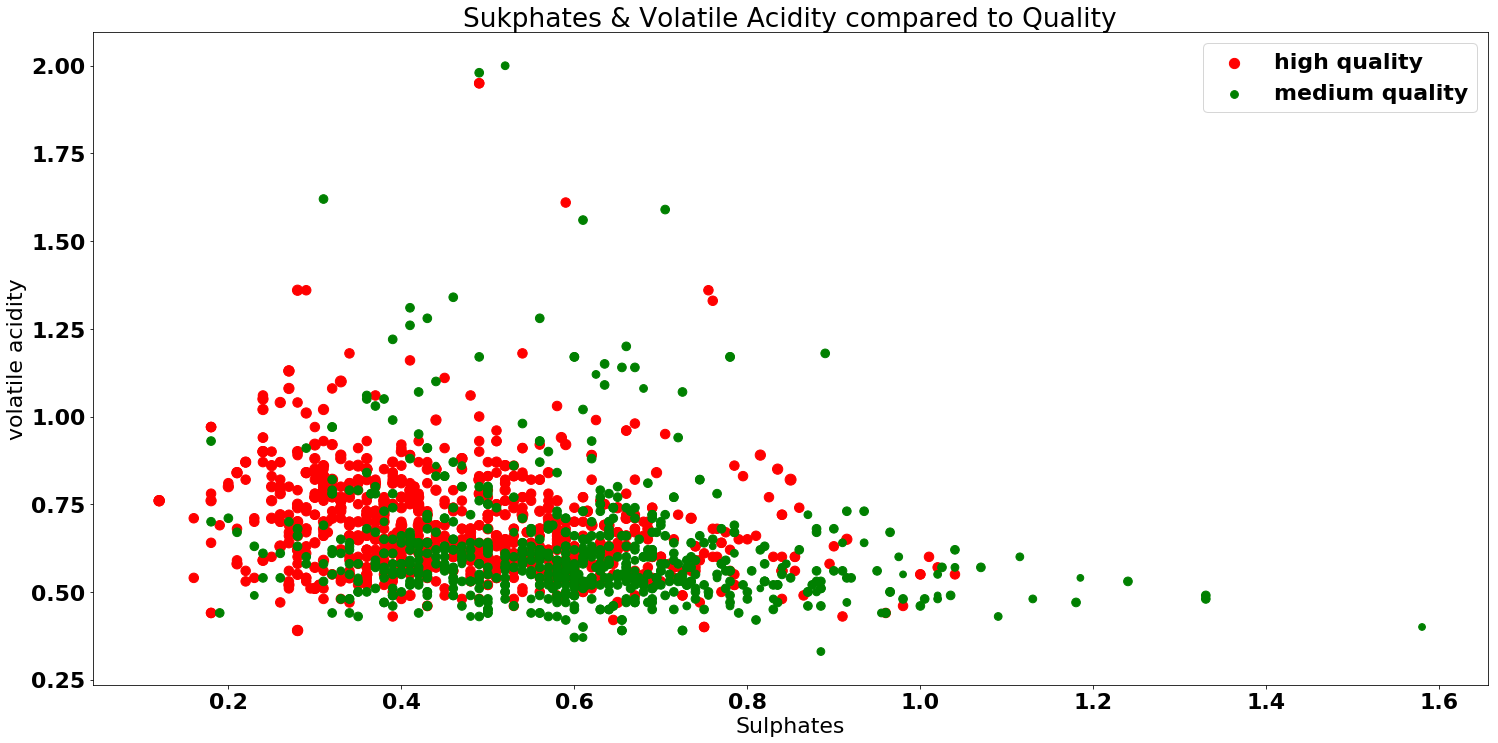

In [13]:
plt.figure(figsize=(25, 12))
ax = plt.subplot()

ax.scatter(data[data['quality_score'] == 'high']['volatile acidity'], data[data['quality_score'] == 'high']['sulphates'], c='red', s=data[data['quality_score'] == 'high']['quality']*15, label='high quality')
ax.scatter(data[data['quality_score'] == 'med']['volatile acidity'], data[data['quality_score'] == 'med']['sulphates'], c='green', s=data[data['quality_score'] == 'med']['quality']*15, label='medium quality')

ax.set_title('Sukphates & Volatile Acidity compared to Quality')
ax.set_xlabel('Sulphates')
ax.set_ylabel('volatile acidity')
font = {'family' : 'DejaVu Sans', 'weight' : 'bold', 'size' : '22'}
plt.rc('font', **font)

plt.legend();
plt.show()

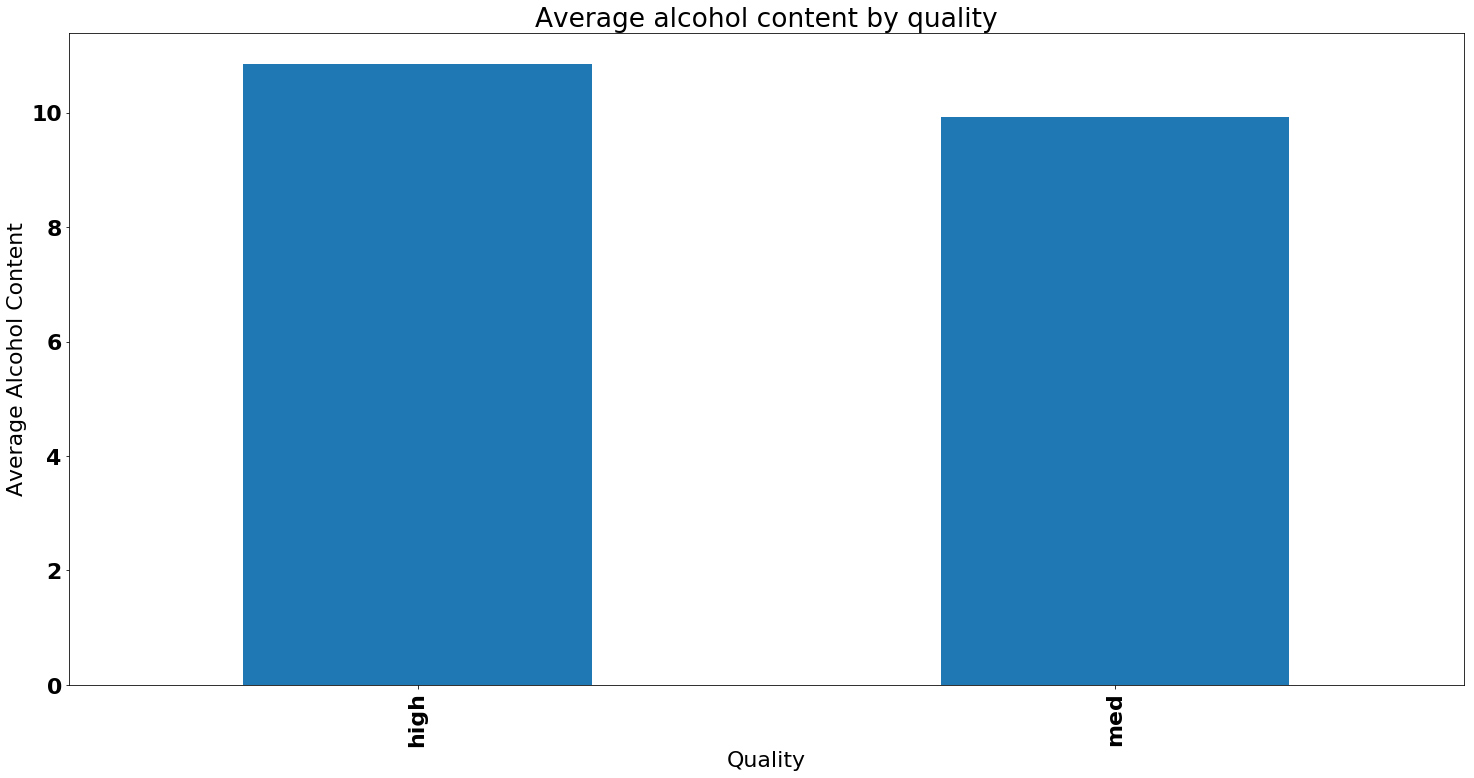

In [14]:
ax = plt.subplot()
data.groupby('quality_score').mean()['alcohol'].plot(kind='bar', figsize=(25, 12), ax=ax)

ax.set_title('Average alcohol content by quality')
ax.set_xlabel('Quality')
ax.set_ylabel('Average Alcohol Content')
font = {'family' : 'DejaVu Sans', 'weight' : 'bold', 'size' : '22'}
plt.rc('font', **font)

plt.show()

In [15]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,med
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,med
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,med
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,med


In [16]:
data['Q'] = np.where(data['quality_score'] == 'low', 0,
                    np.where(data['quality_score'] == 'med', 1, np.where(data['quality_score'] == 'high', 2,3)))
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_score,Q
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,med,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,med,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,med,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,high,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,med,1


In [17]:
y = data['Q'].values

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics

In [19]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_score,Q
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,med,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,med,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,med,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,high,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,med,1


In [20]:
data.drop('quality_score', axis=1, inplace=True)
data.drop('Q', axis=1, inplace=True)
data.drop('quality', axis=1, inplace=True)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=12, stratify = y)

grad_boost = GradientBoostingClassifier()
grad_boost.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [22]:
grad_boost.score(X_test,y_test)

0.77500000000000002

In [23]:
prec, recall, fscore, support = metrics.precision_recall_fscore_support(
    y_test, grad_boost.predict(X_test))
fscore

array([ 0.75342466,  0.79310345])

In [24]:
target_names = ['high quality', 'medium quality']
print(classification_report(y_test, grad_boost.predict(X_test), target_names=target_names))

                precision    recall  f1-score   support

  high quality       0.77      0.74      0.75       223
medium quality       0.78      0.81      0.79       257

   avg / total       0.77      0.78      0.77       480



In [25]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [26]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(X_train, y_train)

In [27]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

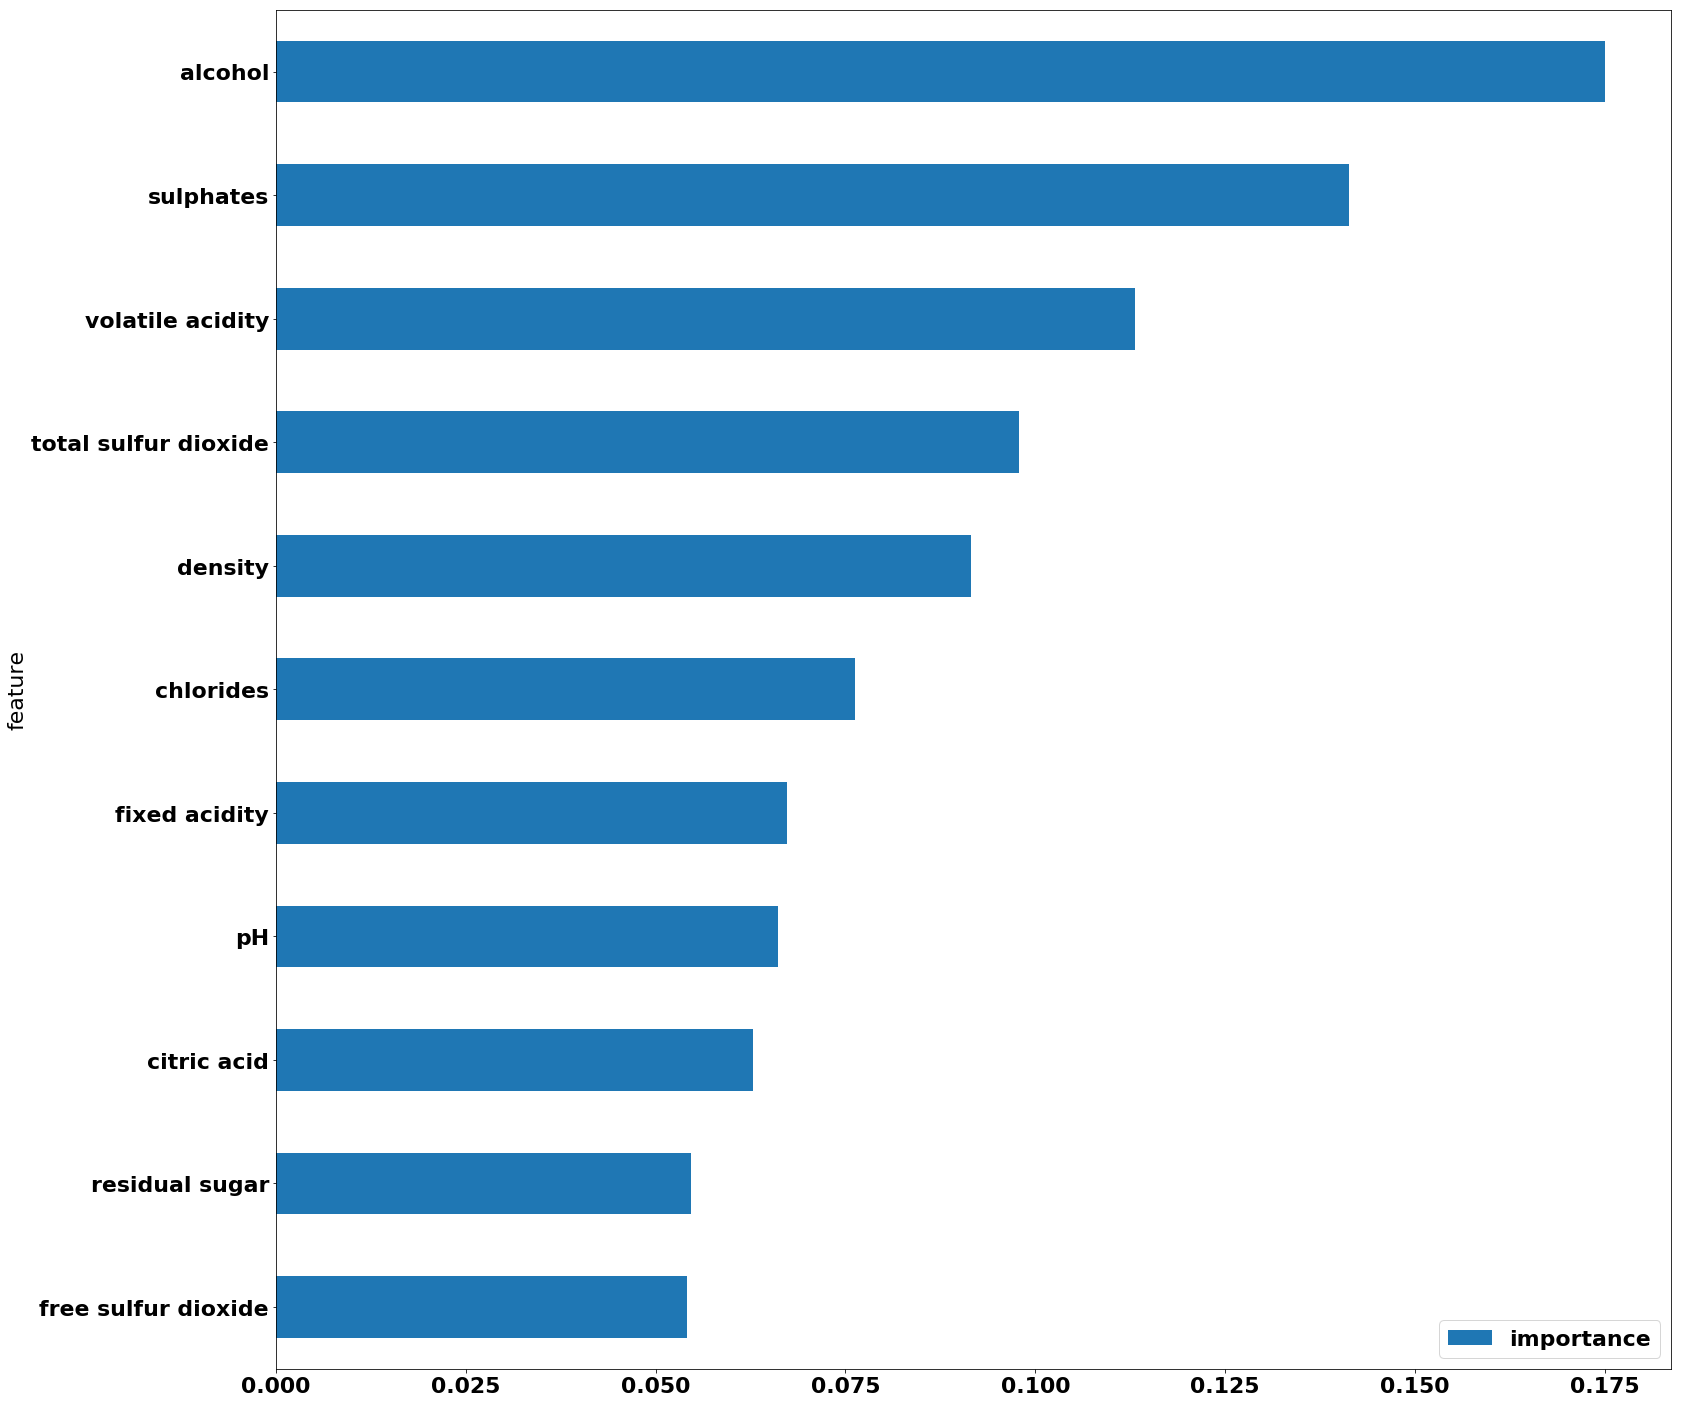

In [28]:
features.plot(kind='barh', figsize=(25, 25))
plt.show()

In [31]:
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier(random_state=42)
gboost = GradientBoostingClassifier(random_state=20)

models = [logreg, logreg_cv, rf, gboost]

In [32]:
for model in models:
    print('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=X_train, y=y_train, scoring='accuracy')
    print('CV score = {0}'.format(score))
    print('****')

Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegression'>
CV score = 0.7337221688376397
****
Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>
CV score = 0.7390833155384726
****
Cross-validation of : <class 'sklearn.ensemble.forest.RandomForestClassifier'>
CV score = 0.7658891558118015
****
Cross-validation of : <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
CV score = 0.7819768132963201
****


In [33]:
model = GradientBoostingClassifier(verbose=1, random_state=20)
model.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3247            0.00s
         2           1.2765            0.20s
         3           1.2345            0.13s
         4           1.1966            0.19s
         5           1.1634            0.23s
         6           1.1337            0.25s
         7           1.1073            0.21s
         8           1.0843            0.23s
         9           1.0627            0.20s
        10           1.0443            0.18s
        20           0.9152            0.14s
        30           0.8432            0.10s
        40           0.7922            0.09s
        50           0.7578            0.06s
        60           0.7307            0.05s
        70           0.7030            0.03s
        80           0.6753            0.02s
        90           0.6500            0.01s
       100           0.6266            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=20, subsample=1.0, verbose=1,
              warm_start=False)

In [34]:
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8, 10, 20, 25],
                 'n_estimators': [50, 10, 20, 100, 200, 1000],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3,4,5,6,7,8,9, 10],
                 'min_samples_leaf': [2,3,4,5,6,7,8],
                 }
    boost = GradientBoostingClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(boost,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1,
                               n_jobs=-1
                              )

    grid_search.fit(X_train, y_train)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
else: 
    parameters = {'min_samples_leaf': 7, 
                  'n_estimators': 200, 'min_samples_split': 6, 
                  'max_features': 'log2', 'max_depth': 4}
    
    model = GradientBoostingClassifier(**parameters)
    model.fit(X_train, y_train)

In [35]:
scores = cross_val_score(model, X_train, y_train, cv = 5, scoring='accuracy')
scores.mean()

0.78642115097159937

In [36]:
# output = model.predict(test).astype(int)
# df_output = data
# file = os.path.join('winequality-red.csv')
# aux = pd.read_csv(file)
# df_output[data.index] = aux.index
# df_output['quality_score'] = output
# df_output[[data.index],'quality_score'].to_csv('red_wine_model.csv', index=False)